# 波士顿房价的预测

## 加载并查看数据

In [1]:
# -*- coding: utf8 -*-
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# 波士顿房价数据
boston = load_boston()
# type = array
x = boston.data
y = boston.target

In [2]:
# 补全数据，because the features of boston housing only have 13, we should add 3 column to form a matrix
# Select 3 column optionally
x_3 = x[:,3:6]
x = np.column_stack([x,x_3]) # 随意给x增加了3列，x变为16列，可以reshape为4*4矩阵了 没啥用，就是凑个正方形
print("the shape of features: ", x.shape)
print("the shape of labes:    ", y.shape)

the shape of features:  (506, 16)
the shape of labes:     (506,)


In [3]:
# 先将 x 和 y 列合并，然后在将 array 转为 DataFrame
boston_housing_array = np.c_[x, y]
boston_housing = pd.DataFrame(boston_housing_array)
boston_housing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.0,0.538,6.575,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.0,0.469,6.421,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.0,0.469,7.185,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.0,0.458,6.998,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.0,0.458,7.147,36.2


In [4]:
boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
13    506 non-null float64
14    506 non-null float64
15    506 non-null float64
16    506 non-null float64
dtypes: float64(17)
memory usage: 67.3 KB


In [5]:
boston_housing.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,0.069170,0.554695,6.284634,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,0.253994,0.115878,0.702617,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,0.000000,0.385000,3.561000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,0.000000,0.449000,5.885500,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,0.000000,0.538000,6.208500,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,0.000000,0.624000,6.623500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,1.000000,0.871000,8.780000,50.000000


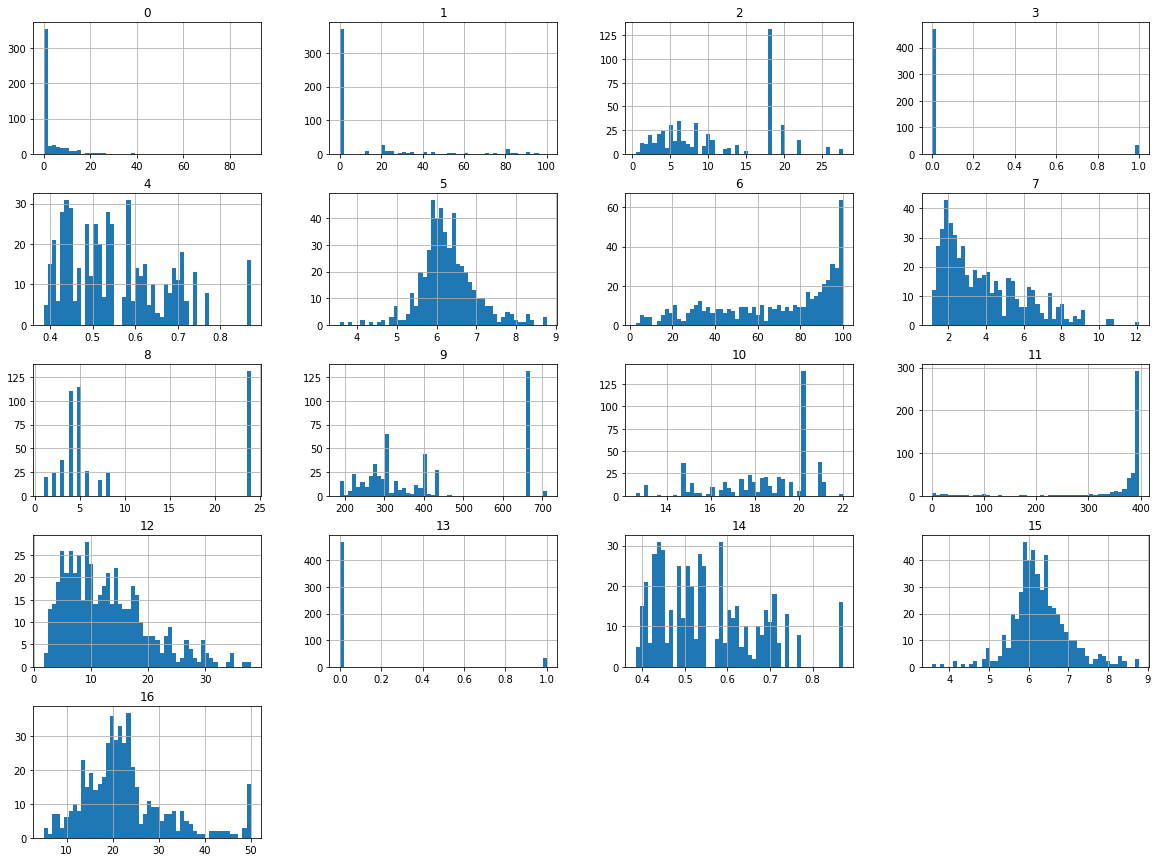

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
boston_housing.hist(bins=50, figsize=(20,15))
plt.show()

## 标准化选择 train and test，先分析 label 的数据，看看怎么进行 标准化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E538A550F0>]],
      dtype=object)

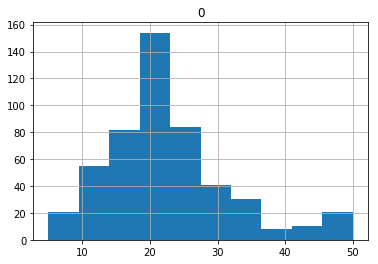

In [7]:
label = pd.DataFrame(y)
label.hist()

In [8]:
label[10 > label] = 0
label[(20 > label) & (label > 10)] = 1
label[(30 > label) & (label > 20)] = 2
label[(40 > label) & (label > 30)] = 3
label[(50 > label) & (label > 40)] = 4

In [9]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
0    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [10]:
boston_housing['index'] = label

In [11]:
boston_housing['index'].value_counts()

2.0     207
1.0     186
3.0      53
0.0      24
50.0     16
4.0      15
20.0      5
Name: index, dtype: int64

In [12]:
# 开始标准化分类
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(boston_housing, boston_housing["index"]):
    strat_train_set = boston_housing.loc[train_index]
    strat_test_set = boston_housing.loc[test_index]

In [13]:
strat_test_set["index"].value_counts() / len(strat_test_set)

2.0     0.411765
1.0     0.362745
3.0     0.107843
0.0     0.049020
50.0    0.029412
4.0     0.029412
20.0    0.009804
Name: index, dtype: float64

In [14]:
def income_cat_proportions(data):
    return data["index"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(boston_housing),
    "Stratified": income_cat_proportions(strat_test_set)
}).sort_index()
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [15]:
compare_props

,Overall,Stratified,Strat. %error
0.0,0.047431,0.049020,3.349673
1.0,0.367589,0.362745,-1.317731
2.0,0.409091,0.411765,0.653595
3.0,0.104743,0.107843,2.959674
4.0,0.029644,0.029412,-0.784314
20.0,0.009881,0.009804,-0.784314
50.0,0.031621,0.029412,-6.985294


In [16]:
# 去除掉 index
for set_ in (strat_train_set, strat_test_set):
    set_.drop("index", axis=1, inplace=True)

In [17]:
# 将分类好的 dataframe 转为 numpy
strat_train_set_array = strat_train_set.values
strat_test_set_array = strat_test_set.values

In [18]:
print("the shape of the train set is: ", strat_train_set_array.shape)
print("the shape of the test set is:  ", strat_test_set_array.shape)

the shape of the train set is:  (404, 17)
the shape of the test set is:   (102, 17)


In [19]:
# 数据 标准化
def normalize_data(data):
    return (data-np.mean(boston_housing_array))/np.std(boston_housing_array)

normalize_train_set = normalize_data(strat_train_set_array)
normalize_test_set = normalize_data(strat_test_set_array)

In [20]:
# 分割 features 和 label
normalize_train_set_label = pd.DataFrame(normalize_train_set)[16].values.reshape(-1, 1)
normalize_test_set_label = pd.DataFrame(normalize_test_set)[16].values.reshape(-1, 1)

normalize_train_set_features = pd.DataFrame(normalize_train_set).drop(16, axis=1, inplace=False).values
normalize_test_set_features = pd.DataFrame(normalize_test_set).drop(16, axis=1, inplace=False).values

print("the features shape of the normalize train set is: ", normalize_train_set_features.shape)
print("the features shape of the normalize test set is: ", normalize_test_set_features.shape)
print("the label shape of the normalize train set is: ", normalize_train_set_label.shape)
print("the label shape of the normalize test set is: ", normalize_test_set_label.shape)

the features shape of the normalize train set is:  (404, 16)
the features shape of the normalize test set is:  (102, 16)
the label shape of the normalize train set is:  (404, 1)
the label shape of the normalize test set is:  (102, 1)


In [21]:
#准确率计算
# def compute_accuracy(v_xs, v_ys):
#     global prediction
#     y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
#     correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
#     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#     result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
#     return result

# 构建 卷积神经网络

In [34]:
# 矩阵权重
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

# 偏置
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# 卷积处理 变厚过程
def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1] x_movement、y_movement就是步长
    # Must have strides[0] = strides[3] = 1 padding='SAME'表示卷积后长宽不变
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# pool 长宽缩小一倍
def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
 
# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 16]) #原始数据的维度：16
ys = tf.placeholder(tf.float32, [None, 1])#输出数据为维度：1
 
keep_prob = tf.placeholder(tf.float32)#dropout的比例
 
x_image = tf.reshape(xs, [-1, 4, 4, 1])#原始数据16变成二维图片4*4
## conv1 layer ##第一卷积层
W_conv1 = weight_variable([2,2, 1,32]) # patch 2x2, in size 1, out size 32,每个像素变成32个像素，就是变厚的过程
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 2x2x32，长宽不变，高度为32的三维图像
#h_pool1 = max_pool_2x2(h_conv1)     # output size 2x2x32 长宽缩小一倍
 
## conv2 layer ##第二卷积层
W_conv2 = weight_variable([2,2, 32, 64]) # patch 2x2, in size 32, out size 64
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2) + b_conv2) #输入第一层的处理结果 输出shape 4*4*64
 
## fc1 layer ##  full connection 全连接层
W_fc1 = weight_variable([4*4*64, 512])#4x4 ，高度为64的三维图片，然后把它拉成512长的一维数组
b_fc1 = bias_variable([512])
 
h_pool2_flat = tf.reshape(h_conv2, [-1, 4*4*64])#把4*4，高度为64的三维图片拉成一维数组 降维处理
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)#把数组中扔掉比例为keep_prob的元素
## fc2 layer ## full connection
W_fc2 = weight_variable([512, 1])#512长的一维数组压缩为长度为1的数组
b_fc2 = bias_variable([1])#偏置
#最后的计算结果
prediction =  tf.matmul(h_fc1_drop, W_fc2) + b_fc2
#prediction = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
# 计算 predition与y 差距 所用方法很简单就是用 suare()平方,sum()求和,mean()平均值
cross_entropy = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
# 0.01学习效率,minimize(loss)减小loss误差
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)
 
sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
sess.run(tf.global_variables_initializer())
#训练500次
for i in range(5000):
    sess.run(train_step, feed_dict={xs: normalize_train_set_features, ys: normalize_train_set_label, keep_prob: 0.7})
    if i % 10 == 0:
        print(i,'误差=',sess.run(cross_entropy, feed_dict={xs: normalize_train_set_features, ys: normalize_train_set_label, keep_prob: 1.0}))  # 输出loss值

0 误差= 586.994
10 误差= 0.0053678523
20 误差= 0.005753843
30 误差= 0.004877143
40 误差= 0.004707759
50 误差= 0.0044025485
60 误差= 0.004014976
70 误差= 0.0037478297
80 误差= 0.0036898286
90 误差= 0.003682801
100 误差= 0.0036705509
110 误差= 0.0036508383
120 误差= 0.003660187
130 误差= 0.0036499952
140 误差= 0.003652387
150 误差= 0.0036442433
160 误差= 0.0036462862
170 误差= 0.0036962929
180 误差= 0.0037688084
190 误差= 0.0036843685
200 误差= 0.0036701062
210 误差= 0.0036449297
220 误差= 0.0037225864
230 误差= 0.003650632
240 误差= 0.003748218
250 误差= 0.0033240106
260 误差= 0.0031151376
270 误差= 0.0030440039
280 误差= 0.002996434
290 误差= 0.0029530183
300 误差= 0.0028879337
310 误差= 0.0028724712
320 误差= 0.0028296893
330 误差= 0.00277965
340 误差= 0.0027594701
350 误差= 0.002720978
360 误差= 0.002700598
370 误差= 0.002663515
380 误差= 0.0026426725
390 误差= 0.0026680012
400 误差= 0.0026526316
410 误差= 0.002583744
420 误差= 0.002641336
430 误差= 0.0025809326
440 误差= 0.002599042
450 误差= 0.0025167146
460 误差= 0.002500744
470 误差= 0.0025043045
480 误差= 0.0024418563
490 误差

3810 误差= 0.00110233
3820 误差= 0.0010895907
3830 误差= 0.0013035133
3840 误差= 0.0013444441
3850 误差= 0.0011756193
3860 误差= 0.0010866605
3870 误差= 0.0011933882
3880 误差= 0.001119819
3890 误差= 0.0010543871
3900 误差= 0.001273495
3910 误差= 0.001072594
3920 误差= 0.0012149693
3930 误差= 0.0012739681
3940 误差= 0.0015462398
3950 误差= 0.0017147152
3960 误差= 0.0011011708
3970 误差= 0.0011606979
3980 误差= 0.0015045747
3990 误差= 0.0011003787
4000 误差= 0.0022218751
4010 误差= 0.0013997405
4020 误差= 0.0010759484
4030 误差= 0.0015515755
4040 误差= 0.0013118517
4050 误差= 0.0011072969
4060 误差= 0.0011025359
4070 误差= 0.0010386255
4080 误差= 0.0010811659
4090 误差= 0.001036011
4100 误差= 0.0011398164
4110 误差= 0.0010051886
4120 误差= 0.0015298832
4130 误差= 0.0011040611
4140 误差= 0.001115148
4150 误差= 0.0010848518
4160 误差= 0.0011143683
4170 误差= 0.0010745828
4180 误差= 0.0011065913
4190 误差= 0.0013820848
4200 误差= 0.0013208432
4210 误差= 0.0014865889
4220 误差= 0.0011292164
4230 误差= 0.0010656669
4240 误差= 0.0010875253
4250 误差= 0.001364715
4260 误差= 0.0011429

In [35]:
# 数据 反标准化
def anti_normalize_data(data):
    return data * np.std(boston_housing_array) + np.mean(boston_housing_array)

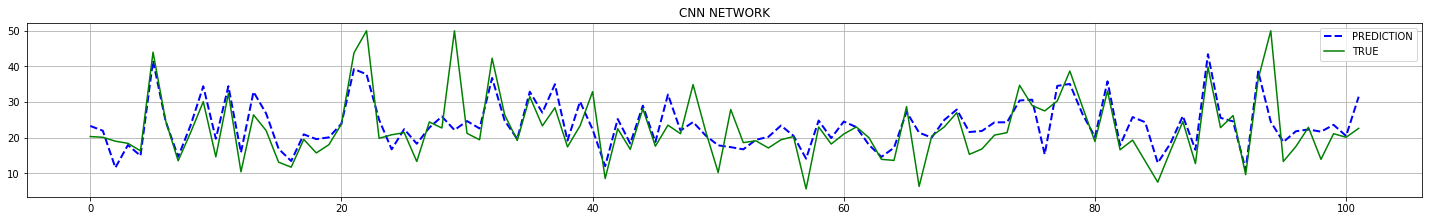

In [36]:
# 可视化
prediction_value = sess.run(prediction, feed_dict={xs: normalize_test_set_features, ys: normalize_test_set_label, keep_prob: 1.0})

fig = plt.figure(figsize=(20, 3))  # dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80
axes = fig.add_subplot(1, 1, 1)

prediction_value = anti_normalize_data(prediction_value)
normalize_test_set_label_ture = anti_normalize_data(normalize_test_set_label)

line1,=axes.plot(range(len(prediction_value)), prediction_value, 'b--',label='PREDICTION',linewidth=2)
line2,=axes.plot(range(len(normalize_test_set_label_ture)), normalize_test_set_label_ture, 'g',label='TRUE')
 
axes.grid()
fig.tight_layout()

plt.legend(handles=[line1,  line2])
plt.title('CNN NETWORK')
plt.show()